In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
df=pd.read_csv('/content/credit_card.csv')

In [3]:
df.head(2)

,Client_Num,Card_Category,Annual_Fees,Activation_30_Days,Customer_Acq_Cost,Week_Start_Date,Week_Num,Qtr,current_year,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Vol,Avg_Utilization_Ratio,Use Chip,Exp Type,Interest_Earned,Delinquent_Acc
0,708082083,Blue,200,0,87,01-01-2023,Week-1,Q1,2023,3544.0,1661,15149,111,0.469,Chip,Travel,4393.21,0
1,708083283,Blue,445,1,108,01-01-2023,Week-1,Q1,2023,3421.0,2517,992,21,0.736,Swipe,Entertainment,69.44,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10108 entries, 0 to 10107
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Client_Num             10108 non-null  int64  
 1   Card_Category          10108 non-null  object 
 2   Annual_Fees            10108 non-null  int64  
 3   Activation_30_Days     10108 non-null  int64  
 4   Customer_Acq_Cost      10108 non-null  int64  
 5   Week_Start_Date        10108 non-null  object 
 6   Week_Num               10108 non-null  object 
 7   Qtr                    10108 non-null  object 
 8   current_year           10108 non-null  int64  
 9   Credit_Limit           10108 non-null  float64
 10  Total_Revolving_Bal    10108 non-null  int64  
 11  Total_Trans_Amt        10108 non-null  int64  
 12  Total_Trans_Vol        10108 non-null  int64  
 13  Avg_Utilization_Ratio  10108 non-null  float64
 14  Use Chip               10108 non-null  object 
 15  Ex

In [5]:
df.isnull().sum()

,0
Client_Num,0
Card_Category,0
Annual_Fees,0
Activation_30_Days,0
Customer_Acq_Cost,0
Week_Start_Date,0
Week_Num,0
Qtr,0
current_year,0
Credit_Limit,0


In [6]:
total_customer = df['Client_Num'].nunique()
df['total_customer'] = total_customer


## **EXPLORATORY DATA ANALYSIS**

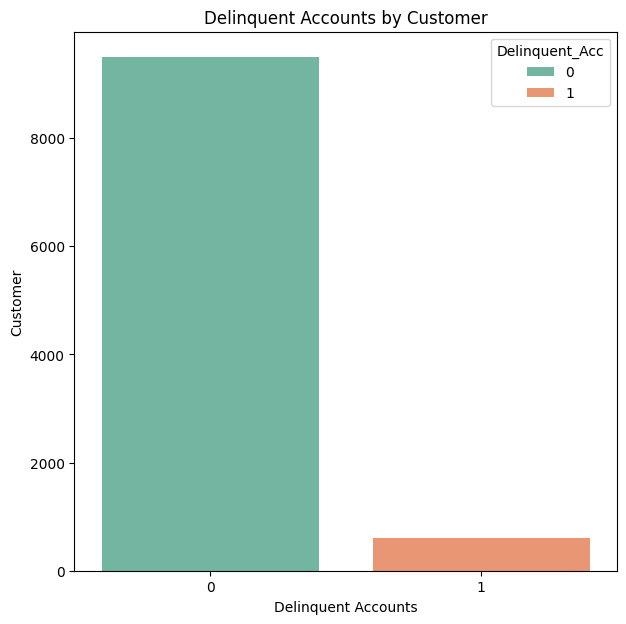

In [7]:
plt.figure(figsize=(7,7))
sns.countplot(x='Delinquent_Acc',hue='Delinquent_Acc', data=df,palette='Set2')

# This `countplot` visualizes the distribution of delinquent accounts (`Delinquent_Acc`).
# The `hue` parameter is set to `Delinquent_Acc`, but since this is the same variable, it doesn't add
# meaningful categorization. It simply color codes the bars to indicate whether customers are delinquent ('1') or non-delinquent ('0').

plt.title('Delinquent Accounts by Customer')
plt.xlabel('Delinquent Accounts')
plt.ylabel('Customer')
plt.show()

# '0' represents customers with no overdue payments (non-delinquent).
# '1' represents customers with overdue payments (delinquent).
# The plot shows a total of 10,108 customers. Around 9,000 of them have no overdue payments ('0'),
# while the remaining customers are delinquent ('1').




In [8]:
Card_category=df['Card_Category'].value_counts()

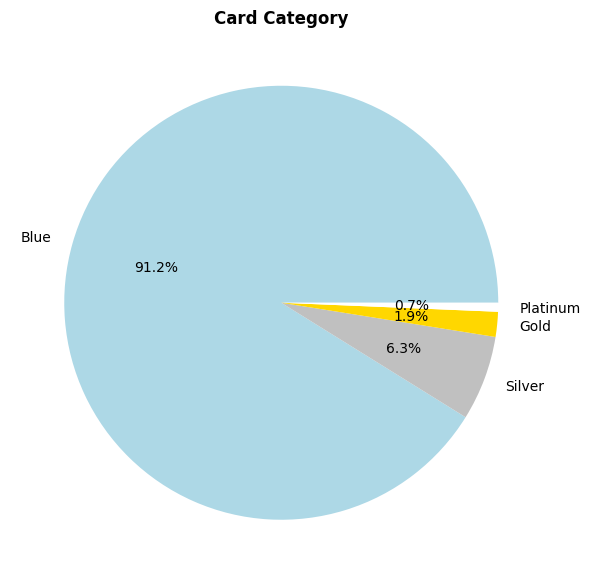

In [9]:
plt.figure(figsize=(7,10))

plt.pie(Card_category,labels=Card_category.index,autopct='%1.1f%%',colors=['lightblue','silver','gold','white'])

plt.title('Card Category',fontweight='bold')
plt.show()

# 91.2% of customers have the Blue card.
# 6.3% have the Silver card.
# 1.9% have the Gold card.
# 0.7% have the Platinum card.
# This pie chart visually demonstrates that the Blue card is by far the most popular choice among customers,
# while Silver, Gold, and Platinum cards are less common.


<ipython-input-10-7af04e23d041>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Card_Category',y='Credit_Limit',data=df,palette='Set2')


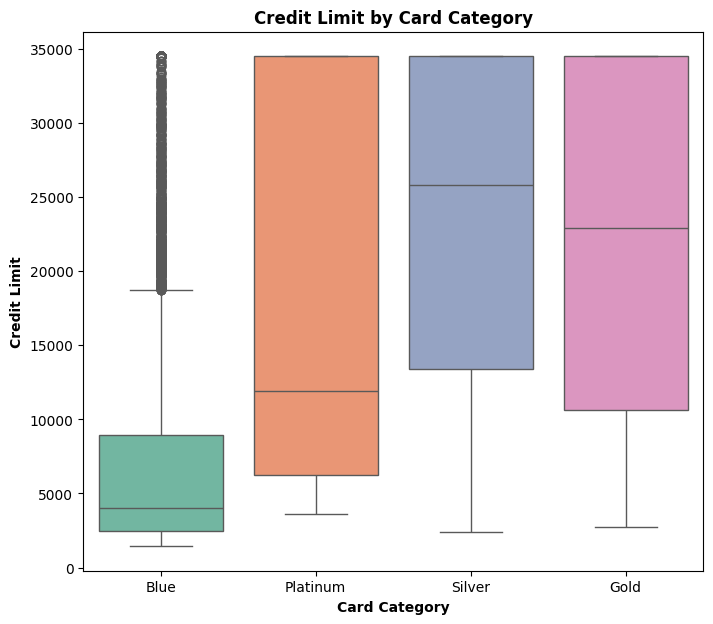

In [10]:
plt.figure(figsize=(8,7))
sns.boxplot(x='Card_Category',y='Credit_Limit',data=df,palette='Set2')

plt.title('Credit Limit by Card Category',fontweight='bold')
plt.xlabel('Card Category',fontweight='bold')
plt.ylabel('Credit Limit',fontweight='bold')
plt.show()

#Blue Card- The Blue card has a wider range of credit limits, with values ranging from lower to higher limits. The median is higher compared to other card categories.
#Silver Card- The Silver card has a slightly smaller range of credit limits, but the distribution is still comparable to the Blue card.
#Gold and Platinum Cards- The Gold and Platinum cards generally have a smaller range, with lower median values compared to Blue and Silver cards.

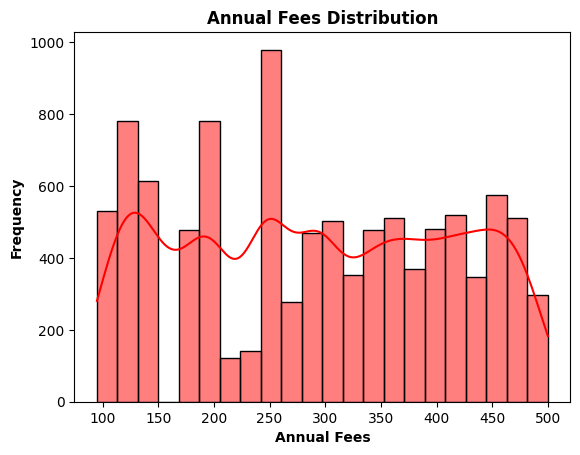

In [11]:
sns.histplot(data=df,x='Annual_Fees',color='red',kde=True)

plt.title('Annual Fees Distribution',fontweight='bold')
plt.xlabel('Annual Fees',fontweight='bold')
plt.ylabel('Frequency',fontweight='bold')
plt.show()

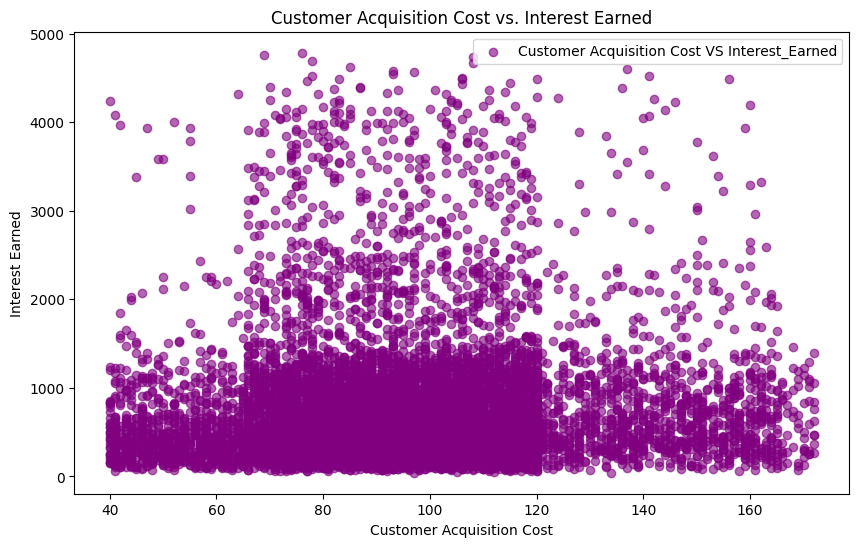

In [12]:
plt.figure(figsize=(10,6))
plt.scatter(df['Customer_Acq_Cost'], df['Interest_Earned'], alpha=0.6, color='purple',label='Customer Acquisition Cost VS Interest_Earned')

plt.title('Customer Acquisition Cost vs. Interest Earned')
plt.xlabel('Customer Acquisition Cost')
plt.ylabel('Interest Earned')
plt.legend()
plt.show()




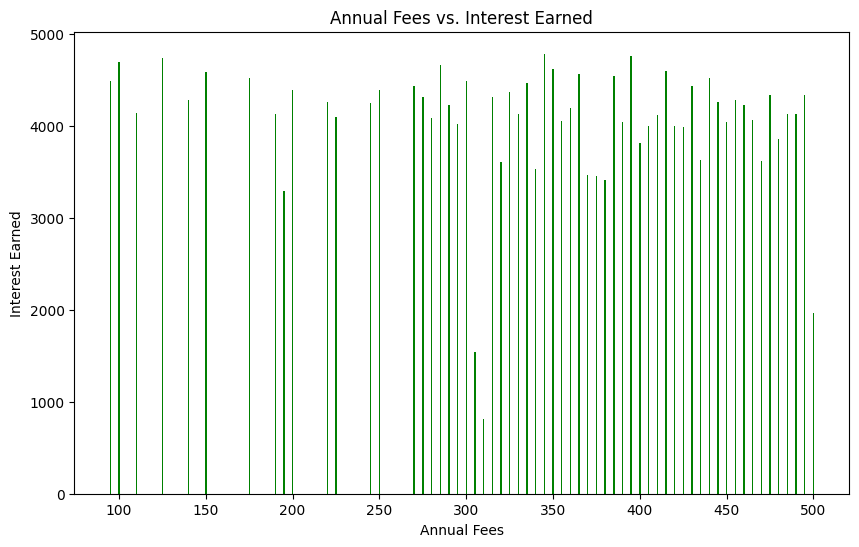

In [13]:
plt.figure(figsize=(10,6))
plt.bar(df['Annual_Fees'], df['Interest_Earned'], color='green')

plt.title('Annual Fees vs. Interest Earned')
plt.xlabel('Annual Fees')
plt.ylabel('Interest Earned')

plt.show()


In [14]:
#DROPPING UNWANTED COLUMNS
df.columns

Index(['Client_Num', 'Card_Category', 'Annual_Fees', 'Activation_30_Days',
       'Customer_Acq_Cost', 'Week_Start_Date', 'Week_Num', 'Qtr',
       'current_year', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Trans_Amt', 'Total_Trans_Vol', 'Avg_Utilization_Ratio',
       'Use Chip', 'Exp Type', 'Interest_Earned', 'Delinquent_Acc',
       'total_customer'],
      dtype='object')

In [15]:
df=df.drop(columns=['Client_Num','Activation_30_Days','Qtr','current_year',])
df=df.drop(columns=['Week_Start_Date'])
df=df.drop(columns=['Week_Num'])

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
ler=LabelEncoder()

In [18]:
df['Card_Category']=ler.fit_transform(df['Card_Category'])
df['Use Chip']=ler.fit_transform(df['Use Chip'])
df['Exp Type']=ler.fit_transform(df['Exp Type'])

In [19]:
df.columns

Index(['Card_Category', 'Annual_Fees', 'Customer_Acq_Cost', 'Credit_Limit',
       'Total_Revolving_Bal', 'Total_Trans_Amt', 'Total_Trans_Vol',
       'Avg_Utilization_Ratio', 'Use Chip', 'Exp Type', 'Interest_Earned',
       'Delinquent_Acc', 'total_customer'],
      dtype='object')

In [20]:
X=df[['Card_Category', 'Annual_Fees', 'Customer_Acq_Cost', 'Credit_Limit', 'Total_Revolving_Bal', 'Total_Trans_Amt',
       'Total_Trans_Vol', 'Avg_Utilization_Ratio', 'Use Chip', 'Exp Type', 'Interest_Earned']]

In [21]:
y=df[['Delinquent_Acc']]

In [22]:
df['Delinquent_Acc'].value_counts()

,count
Delinquent_Acc,
0,9494
1,614


In [23]:
from imblearn.over_sampling import RandomOverSampler

In [24]:
ros=RandomOverSampler()

In [25]:
X,y=ros.fit_resample(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [26]:
y['Delinquent_Acc'].value_counts()

,count
Delinquent_Acc,
0,9494
1,9494


In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
scaler=MinMaxScaler()

In [29]:
scaler.fit_transform(X)

array([[0.        , 0.25925926, 0.35606061, ..., 0.        , 1.        ,
        0.91739372],
       [0.        , 0.86419753, 0.51515152, ..., 1.        , 0.2       ,
        0.00575602],
       [0.        , 0.11111111, 0.5       , ..., 0.        , 0.        ,
        0.03382769],
       ...,
       [0.        , 0.11111111, 0.43181818, ..., 1.        , 0.8       ,
        0.03429576],
       [0.66666667, 0.7037037 , 0.48484848, ..., 1.        , 0.6       ,
        0.3795579 ],
       [0.        , 0.64197531, 0.1969697 , ..., 1.        , 0.2       ,
        0.06458972]])

In [30]:
scaler.fit_transform(y)

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]])

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.82,random_state=42)

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
ssc=StandardScaler()

In [35]:
X_train=ssc.fit_transform(X_train)
X_test=ssc.transform(X_test)

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
dsc=DecisionTreeClassifier()

In [38]:
dsc.fit(X_train,y_train)

DecisionTreeClassifier()

In [39]:
y_pred=dsc.predict(X_test)

In [40]:
y_pred

array([0, 1, 0, ..., 0, 1, 1])

In [41]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [42]:
dsc.acc=accuracy_score(y_test,y_pred)

In [43]:
dsc.acc

0.8519041808490142

In [44]:
confusion_matrix(y_test,y_pred)

array([[5791, 2007],
       [ 299, 7474]])

In [45]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.95      0.74      0.83      7798\n           1       0.79      0.96      0.87      7773\n\n    accuracy                           0.85     15571\n   macro avg       0.87      0.85      0.85     15571\nweighted avg       0.87      0.85      0.85     15571\n'

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
rfc=RandomForestClassifier()

In [48]:
rfc.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [49]:
y_pred=rfc.predict(X_test)

In [50]:
rfc.acc=accuracy_score(y_test,y_pred)

In [51]:
rfc.acc

0.9466315586667523

In [52]:
confusion_matrix(y_test,y_pred)

array([[7341,  457],
       [ 374, 7399]])

In [53]:
models='DecisionTree','Randomforestclassifier'

In [54]:
accuracies=[dsc.acc,rfc.acc]

<ipython-input-55-8db8391b97c2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models,y=accuracies,palette=['lightblue','cyan'])


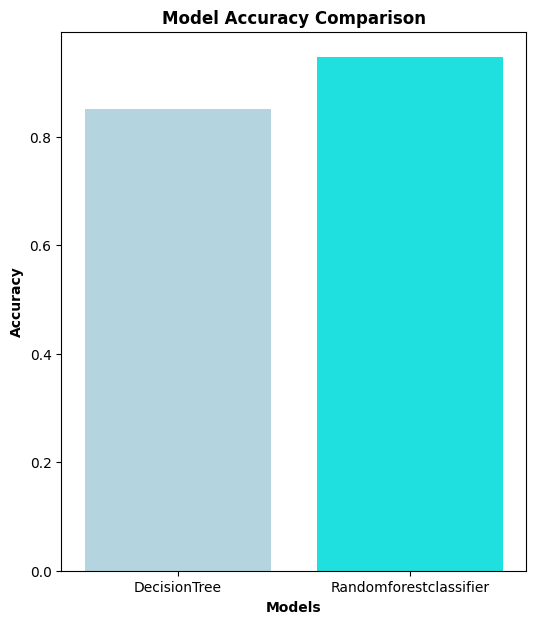

In [55]:
plt.figure(figsize=(6,7))

sns.barplot(x=models,y=accuracies,palette=['lightblue','cyan'])

plt.title('Model Accuracy Comparison',fontweight='bold')
plt.xlabel('Models',fontweight='bold')
plt.ylabel('Accuracy',fontweight='bold')
plt.show()

# RANDOMFORESTCLASSIFIER IS HAVING MORE ACCURACY BY COMAPRING TO DECISSIONTREECLASSIFIER
# DECISIONCLASSIFIER ACCURACY = 0.8463168711065442
# RANDOMFORESTCLASSIFIER ACCURACY = 0.9414295806306595